## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
%pip install catboost

#### Import the CSV Data as Pandas DataFrame

In [6]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [17]:
X = df.drop(columns=['math score'],axis=1)

In [15]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [25]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [19]:
y = df['math score']

In [20]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [41]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)


In [16]:
X = preprocessor.fit_transform(X)

In [36]:
X.shape

(1000, 7)

In [39]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

#### Create an Evaluate Function to give all metrics after model Training

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [47]:
model_list = []
r2_list = []

for name, model in models.items():
    try:
        # Fit on training data and transform both train and test
        X_train_processed = preprocessor.fit_transform(X_train)
        X_test_processed = preprocessor.transform(X_test)
        
        model.fit(X_train_processed, y_train)
        y_train_pred = model.predict(X_train_processed)
        y_test_pred = model.predict(X_test_processed)


        train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
        test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

        print(name)
        model_list.append(name)
        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(train_mae))
        print("- R2 Score: {:.4f}".format(train_r2))
        print('----------------------------------')
        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(test_mae))
        print("- R2 Score: {:.4f}".format(test_r2))
        r2_list.append(test_r2)
        print('='*35, '\n')

    except ValueError as e:
        print(f"ValueError for model {name}: {e}")
    except Exception as e:
        print(f"Exception for model {name}: {e}")


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3244
- Mean Absolute Error: 4.2687
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3979
- Mean Absolute Error: 4.2175
- R2 Score: 0.8803

Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5925
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5173
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254

Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7018
- Mean Absolute Error: 4.5032
- R2 Score: 0.8558
--------------------------

### Results

In [48]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880592
0,Linear Regression,0.880261
5,Random Forest Regressor,0.852454
7,CatBoosting Regressor,0.851831
8,AdaBoost Regressor,0.851829
1,Lasso,0.825446
6,XGBRegressor,0.821794
3,K-Neighbors Regressor,0.786621
4,Decision Tree,0.754252


## Linear Regression

In [57]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train_processed, y_train)
y_pred = lin_model.predict(X_test_processed)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


## Plot y_pred and y_test

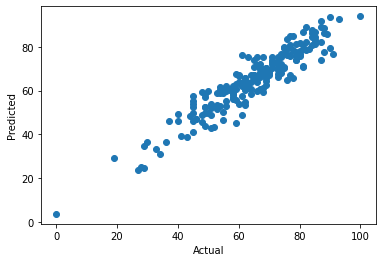

In [58]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

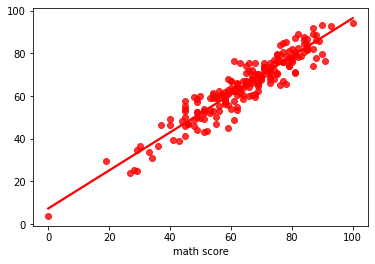

In [59]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [60]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.523438,14.476562
737,53,58.937500,-5.937500
740,80,76.917969,3.082031
660,74,76.796875,-2.796875
411,84,87.601562,-3.601562
...,...,...,...
408,52,43.437500,8.562500
332,62,62.058594,-0.058594
208,74,67.968750,6.031250
613,65,67.132812,-2.132812
